# Starting cluster

## Prerequisites
First, you need to install MPI, on windows use MS-MPI:
https://msdn.microsoft.com/en-us/library/bb524831(v=vs.85).aspx


## With a profile (not working)
In theory, you should be able to create a profile using
```
ipython profile create --parallel --profile=myprofile
```
and then set
```
c.IPClusterEngines.engine_launcher_class = 'MPIEngineSetLauncher'
```
in ```<IPYTHON-DIR>/profile_myprofile/ipcluster_config.py```. This should then enable you to start a cluster using
```
ipcluster start --profile=myprofile
```
or alternatively through the Clusters tab in Jupyter


## Without a profile (not working)
An alternative is to run
```
ipcluster start --engines=MPI
```


## Manual start (working)
This, however, does *not* work for me on Windows. What does work is the following:

Start a controller using
```
ipcontroller --ip='*'
```
and then start several engines using mpiexec:
```
mpiexec -n 4 ipengine --mpi
```

In [1]:
from GPUSimulators import IPythonMagic

In [2]:
%setup_logging --out mpi.log

Console logger using level INFO
File logger using level DEBUG to mpi.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]


In [3]:
%setup_mpi --num_engines 6

Starting IPController
Starting IPEngines
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Done


In [4]:
import ipyparallel

# attach to a running cluster
cluster = ipyparallel.Client()#profile='mpi')

print('profile:', cluster.profile)
print('Number of ids:', len(cluster.ids))
print("IDs:", cluster.ids) # Print process id numbers

profile: default
Number of ids: 6
IDs: [0, 1, 2, 3, 4, 5]


In [5]:
%%px

from mpi4py import MPI
comm = MPI.COMM_WORLD
print("MPI rank {:d} of {:d} OK".format(comm.rank, comm.size))
comm.Barrier()   

[stdout:0] MPI rank 0 of 6 OK
[stdout:1] MPI rank 1 of 6 OK
[stdout:2] MPI rank 2 of 6 OK
[stdout:3] MPI rank 3 of 6 OK
[stdout:4] MPI rank 4 of 6 OK
[stdout:5] MPI rank 5 of 6 OK


In [6]:
%%px

from mpi4py import MPI
import numpy

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

print("Starting")
# passing MPI datatypes explicitly
if rank == 0:
    data = numpy.arange(100, dtype='i')
    numpy.random.shuffle(data)
    comm.Send([data, MPI.INT], dest=1, tag=77)
    print("{0}: sent data to 1: {1}".format(rank, data))
elif rank == 1:
    data = numpy.empty(100, dtype='i')
    comm.Recv([data, MPI.INT], source=0, tag=77)
    print("{0}: received data from 0: {1}".format(rank, data))
else:
    print("{0}: idle".format(rank))
    
print()

[stdout:0] 
Starting
0: sent data to 1: [57 41 43 87 84 77 85 26 93 75 50 64 16 37 19 15 73 89 76 61 71 32  2 67
 20 92 60 47 10 88 21 83 58 56 49 98 27 95  9 62 53 23 39 48 99 28 81 90
 38 63 13 42 96 86  8 80 72 31 11 17 44 14 30 74 59 52 24 33  3 40 51 94
  5 79 25 45 34 82 66 35 18 46 91 36 97  7  1 69  0 70 65 12  4 55 78 29
 22 54  6 68]

[stdout:1] 
Starting
1: received data from 0: [57 41 43 87 84 77 85 26 93 75 50 64 16 37 19 15 73 89 76 61 71 32  2 67
 20 92 60 47 10 88 21 83 58 56 49 98 27 95  9 62 53 23 39 48 99 28 81 90
 38 63 13 42 96 86  8 80 72 31 11 17 44 14 30 74 59 52 24 33  3 40 51 94
  5 79 25 45 34 82 66 35 18 46 91 36 97  7  1 69  0 70 65 12  4 55 78 29
 22 54  6 68]

[stdout:2] 
Starting
2: idle

[stdout:3] 
Starting
3: idle

[stdout:4] 
Starting
4: idle

[stdout:5] 
Starting
5: idle



In [7]:
%%px
from GPUSimulators import IPythonMagic

In [8]:
%%px
%setup_logging --out "'mpi_' + str(MPI.COMM_WORLD.rank) + '.log'"

got unknown result: a987e318-de983b8789e4db5cf4b44010


[stderr:0] 
Console logger using level INFO
File logger using level DEBUG to mpi_0.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
[stderr:1] 
Console logger using level INFO
File logger using level DEBUG to mpi_1.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
[stderr:2] 
Console logger using level INFO
File logger using level DEBUG to mpi_2.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
[stderr:3] 
Console logger using level INFO
File logger using level DEBUG to mpi_3.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
[stderr:4] 
Console logger using level INFO
File logger using level DEBUG to mpi_4.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
[stderr:5] 
Console 

In [9]:
%%px
%cuda_context_handler my_context

[stderr:0] 
Registering my_context in user workspace
PyCUDA version 2018.1.1
CUDA version (10, 0, 0)
Driver version 10000
Using 'GeForce 840M' GPU
Created context handle <292986541248>
Using CUDA cache dir c:\Users\anbro\Documents\projects\GPUSimulators\GPUSimulators\cuda_cache
Autotuning enabled. It may take several minutes to run the code the first time: have patience
[stderr:1] 
Registering my_context in user workspace
PyCUDA version 2018.1.1
CUDA version (10, 0, 0)
Driver version 10000
Using 'GeForce 840M' GPU
Created context handle <831860904784>
Using CUDA cache dir c:\Users\anbro\Documents\projects\GPUSimulators\GPUSimulators\cuda_cache
Autotuning enabled. It may take several minutes to run the code the first time: have patience
[stderr:2] 
Registering my_context in user workspace
PyCUDA version 2018.1.1
CUDA version (10, 0, 0)
Driver version 10000
Using 'GeForce 840M' GPU
Created context handle <177424753472>
Using CUDA cache dir c:\Users\anbro\Documents\projects\GPUSimulators\

In [10]:
%%px
%matplotlib inline

In [11]:
%%px
import numpy as np
from matplotlib import pyplot as plt

In [20]:
%%px

def plotSolution(sim, **kwargs):
    data = sim.sim.u0[0].download(sim.sim.stream)
    ny, nx = data.shape
    
    
    if (MPI.COMM_WORLD.rank != 0):
        mpi_request = sim.comm.Isend(data, dest=0, tag=sim.rank)
        mpi_request.wait()
    else:
        def my_imshow(data, idx, **kwargs):
            i, j = sim.getCoordinate(idx)
            x0 = i * width
            y0 = j * height 
            x1 = x0+width
            y1 = y0+height
            extent=[x0, x1, y0, y1]
            plt.imshow(data, extent=extent, origin='lower', **kwargs)
            plt.plot([x0, x1, x1, x0, x0], [y0, y0, y1, y1, y0], 'k:', alpha=0.1)
        
        mpi_requests = []
        for k in range(1, sim.comm.size):
            buffer = np.empty((ny, nx), dtype=np.float32)
            mpi_requests += [(buffer, sim.comm.Irecv(buffer, source=k, tag=k))]

        plt.figure()
        my_imshow(data, 0, **kwargs)
        idx = 1
        for buffer, request in mpi_requests:
            request.wait()
            my_imshow(buffer, idx, **kwargs)
            idx += 1
        plt.axis('equal')
        plt.colorbar()

In [21]:
%%px

import logging

class MPISimulator(object):
    def __init__(self, sim, comm=MPI.COMM_WORLD):
        self.logger =  logging.getLogger(__name__)
        
        self.sim = sim
        self.comm = comm
        self.rank = comm.rank
        
        #Get global dimensions
        self.grid = MPISimulator.getFactors(self.comm.size, 2)
        
        #Get neighbor node ids
        self.east = self.getEast()
        self.west = self.getWest()
        self.north = self.getNorth()
        self.south = self.getSouth()
        
        #Get local dimensions
        self.gc_x = int(self.sim.u0[0].x_halo)
        self.gc_y = int(self.sim.u0[0].y_halo)
        self.nx = int(self.sim.nx)
        self.ny = int(self.sim.ny)
        self.nvars = 3
        
        #Allocate data for receiving
        #Note that east and west also transfer ghost cells
        #whilst north/south only transfer internal cells
        self.in_e = np.empty((self.nvars, self.ny + 2*self.gc_y, self.gc_x), dtype=np.float32)
        self.in_w = np.empty((self.nvars, self.ny + 2*self.gc_y, self.gc_x), dtype=np.float32)
        self.in_n = np.empty((self.nvars,             self.gc_y,   self.nx), dtype=np.float32)
        self.in_s = np.empty((self.nvars,             self.gc_y,   self.nx), dtype=np.float32)
        
        #Allocate data for sending
        self.out_e = np.empty((self.nvars, self.ny + 2*self.gc_y, self.gc_x), dtype=np.float32)
        self.out_w = np.empty((self.nvars, self.ny + 2*self.gc_y, self.gc_x), dtype=np.float32)
        self.out_n = np.empty((self.nvars,             self.gc_y,   self.nx), dtype=np.float32)
        self.out_s = np.empty((self.nvars,             self.gc_y,   self.nx), dtype=np.float32)
        
        #Set regions for ghost cells to read from
        self.read_e = [  self.nx,         0, self.gc_x, self.ny + 2*self.gc_y]
        self.read_w = [self.gc_x,         0, self.gc_x, self.ny + 2*self.gc_y]
        self.read_n = [self.gc_x,   self.ny,   self.nx,             self.gc_y]
        self.read_s = [self.gc_x, self.gc_y,   self.nx,             self.gc_y]
        
        #Set regions for ghost cells to write to
        self.write_e = [self.nx+self.gc_x,                 0, self.gc_x, self.ny + 2*self.gc_y]
        self.write_w = [                0,                 0, self.gc_x, self.ny + 2*self.gc_y]
        self.write_n = [        self.gc_x, self.ny+self.gc_y,   self.nx,             self.gc_y]
        self.write_s = [        self.gc_x,                 0,   self.nx,             self.gc_y]
        
        #Initialize ghost cells
        self.exchange()
        
        self.logger.debug("Simlator rank {:d} created ".format(self.rank))
                      
    
    def simulate(self, *args, **kwargs):
        self.sim.simulate(*args, **kwargs)
        
    def step(self, *args, **kwargs):
        self.sim.substepDimsplit(dt*0.5, 0)
        self.exchange()
        self.sim.substepDimsplit(dt*0.5, 1)
        self.exchange()
        
        self.sim.t += dt
        self.sim.nt += 2
        #Step forward in time
        #self.sim.step(*args, **kwargs)
        
    
    def download(self):
        raise(NotImplementedError("Needs to be implemented!"))
    
    def synchronize(self):
        raise(NotImplementedError("Needs to be implemented!"))
    
    def check(self):
        return self.sim.check()
    
    def simTime(self):
        return self.sim.simTime()
        
    def simSteps(self):
        return self.sim.simSteps()
    
    def computeDt(self):
        raise(NotImplementedError("Needs to be implemented!"))
        
    def exchange(self):
        #Shorthands for dimensions
        gc_x = self.gc_x
        gc_y = self.gc_y
        nx = self.nx
        ny = self.ny
        
        ####
        # First transfer internal cells north-south
        ####
        
        #Download from the GPU
        for k in range(self.nvars):
            self.sim.u0[k].download(self.sim.stream, cpu_data=self.out_n[k,:,:], async=True, extent=self.read_n)
            self.sim.u0[k].download(self.sim.stream, cpu_data=self.out_s[k,:,:], async=True, extent=self.read_s)
        self.sim.stream.synchronize()
        
        #Send to north/south neighbours
        comm_send = []
        comm_send += [self.comm.Isend(self.out_n, dest=self.north, tag=0)]
        comm_send += [self.comm.Isend(self.out_s, dest=self.south, tag=1)]
        
        #Receive from north/south neighbors
        comm_recv = []
        comm_recv += [self.comm.Irecv(self.in_n, source=self.north, tag=1)]
        comm_recv += [self.comm.Irecv(self.in_s, source=self.south, tag=0)]
        
        #Wait for incoming transfers to complete
        for comm in comm_recv:
            comm.wait()
        
        #Upload to the GPU
        for k in range(self.nvars):
            self.sim.u0[k].upload(self.sim.stream, self.in_n[k,:,:], extent=self.write_n)
            self.sim.u0[k].upload(self.sim.stream, self.in_s[k,:,:], extent=self.write_s)
        
        #Wait for sending to complete
        for comm in comm_send:
            comm.wait()
        
        
        
        ####
        # Then transfer east-west including ghost cells that have been filled in by north-south transfer above
        # Fixme: This can be optimized by overlapping the GPU transfer with the pervious MPI transfer if the corners
        # har handled on the CPU
        ####
        
        #Download from the GPU
        for k in range(self.nvars):
            self.sim.u0[k].download(self.sim.stream, cpu_data=self.out_e[k,:,:], async=True, extent=self.read_e)
            self.sim.u0[k].download(self.sim.stream, cpu_data=self.out_w[k,:,:], async=True, extent=self.read_w)
        self.sim.stream.synchronize()
        
        #Send to east/west neighbours
        comm_send = []
        comm_send += [self.comm.Isend(self.out_e, dest=self.east, tag=2)]
        comm_send += [self.comm.Isend(self.out_w, dest=self.west, tag=3)]
        
        #Receive from east/west neighbors
        comm_recv = []
        comm_recv += [self.comm.Irecv(self.in_e, source=self.east, tag=3)]
        comm_recv += [self.comm.Irecv(self.in_w, source=self.west, tag=2)]
        
        #Wait for incoming transfers to complete
        for comm in comm_recv:
            comm.wait()
        
        #Upload to the GPU
        for k in range(self.nvars):
            self.sim.u0[k].upload(self.sim.stream, self.in_e[k,:,:], extent=self.write_e)
            self.sim.u0[k].upload(self.sim.stream, self.in_w[k,:,:], extent=self.write_w)
        
        #Wait for sending to complete
        for comm in comm_send:
            comm.wait()
    
    
    def getCoordinate(self, rank):
        i = (rank  % self.grid[0])
        j = (rank // self.grid[0])
        return i, j

    def getRank(self, i, j):
        return j*self.grid[0] + i

    def getEast(self):
        i, j = self.getCoordinate(self.rank)
        i = (i+1) % self.grid[0]
        return self.getRank(i, j)

    def getWest(self):
        i, j = self.getCoordinate(self.rank)
        i = (i+self.grid[0]-1) % self.grid[0]
        return self.getRank(i, j)

    def getNorth(self):
        i, j = self.getCoordinate(self.rank)
        j = (j+1) % self.grid[1]
        return self.getRank(i, j)

    def getSouth(self):
        i, j = self.getCoordinate(self.rank)
        j = (j+self.grid[1]-1) % self.grid[1]
        return self.getRank(i, j)
    
    def getFactors(number, num_factors):
        # Adapted from https://stackoverflow.com/questions/28057307/factoring-a-number-into-roughly-equal-factors
        # Original code by https://stackoverflow.com/users/3928385/ishamael

        #Dictionary to remember already computed permutations
        memo = {}
        def dp(n, left): # returns tuple (cost, [factors])
            """
            Recursively searches through all factorizations
            """

            #Already tried: return existing result
            if (n, left) in memo: 
                return memo[(n, left)]

            #Spent all factors: return number itself
            if left == 1:
                return (n, [n])

            #Find new factor
            i = 2
            best = n
            bestTuple = [n]
            while i * i < n:
                #If factor found
                if n % i == 0:
                    #Factorize remainder
                    rem = dp(n // i, left - 1)

                    #If new permutation better, save it
                    if rem[0] + i < best:
                        best = rem[0] + i
                        bestTuple = [i] + rem[1]
                i += 1

            #Store calculation
            memo[(n, left)] = (best, bestTuple)
            return memo[(n, left)]

        assert(isinstance(number, int))
        assert(isinstance(num_factors, int))

        factors = dp(number, num_factors)[1]

        if (len(factors) < num_factors):
            #Split problematic 4
            if (4 in factors):
                factors.remove(4)
                factors.append(2)
                factors.append(2)

        #Pad with ones to guarantee num_factors
        factors = factors + [1]*(num_factors - len(factors))
        return factors

In [22]:
%%px

from GPUSimulators.helpers import InitialConditions
from GPUSimulators.Simulator import BoundaryCondition

nx = 256
ny = 128
g = 9.81
dt = 0.05
width = 100
height = 100


if (MPI.COMM_WORLD.rank == 0):
    h0, hu0, hv0, dx, dy = InitialConditions.bump(nx, ny, width, height, g, x_center=0.75, y_center=0.75)
else:
    h0, hu0, hv0, dx, dy = InitialConditions.bump(nx, ny, width, height, g, h_ref=0.5, h_amp=0.0, u_amp=0.0, v_amp=0.0)
    
bc = BoundaryCondition({
    'north': BoundaryCondition.Type.Dirichlet,
    'south': BoundaryCondition.Type.Dirichlet,
    'east': BoundaryCondition.Type.Dirichlet,
    'west': BoundaryCondition.Type.Dirichlet
})

arguments = {
    'context': my_context,
    'h0': h0, 'hu0': hu0, 'hv0': hv0,
    'nx': nx, 'ny': ny,
    'dx': dx, 'dy': dy, 
    'g': g,
    'boundary_conditions': bc
} 

[output:0]

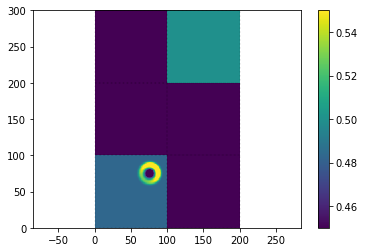

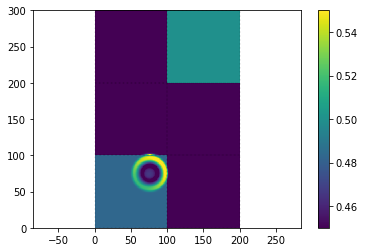

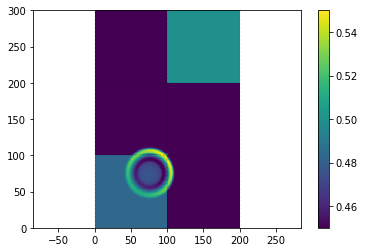

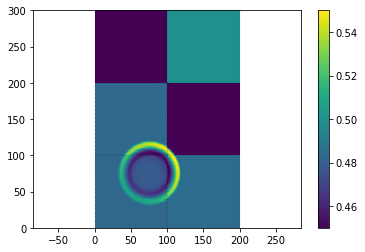

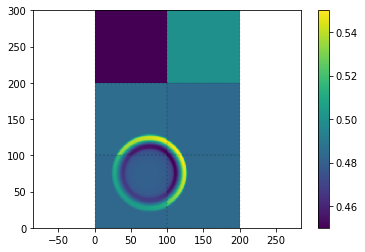

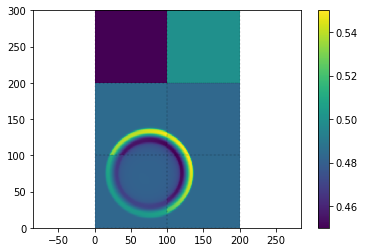

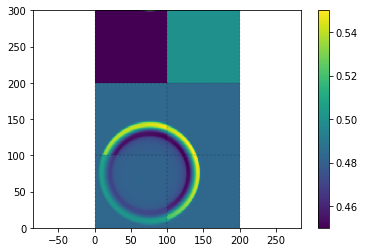

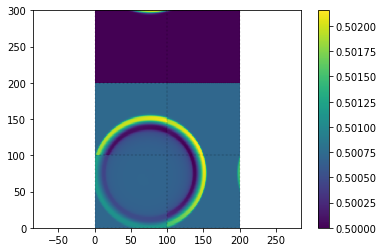

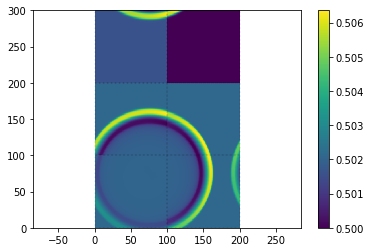

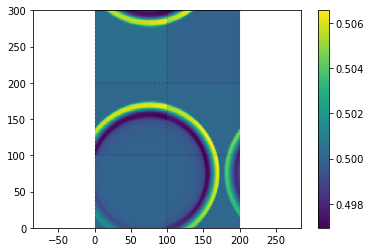

In [23]:
%%px
from GPUSimulators import KP07_dimsplit

local_sim = KP07_dimsplit.KP07_dimsplit(**arguments)
sim = MPISimulator(local_sim, MPI.COMM_WORLD)

n_steps = 10
t_end = 40#n_steps*dt #2*dt

for i in range(n_steps):
    
    #if (rank >= 0):
    #    plt.figure(figsize=(12, 8))
    #    plt.suptitle(str(sim.rank) + " - " + str(sim.simSteps()))
    #    for var in range(3):
    #        h1 = sim.sim.u0[var].download(sim.sim.stream, extent=[0, 0, sim.nx+2*sim.gc_x, sim.ny+2*sim.gc_y])
    #        plt.subplot(2,3,var+1)
    #        plt.imshow(h1)
            
            
    for j in range(int((t_end/n_steps)/dt)):
        sim.step(dt)

        
    #if (rank >= 0):
    #    for var in range(3):
    #        h1 = sim.sim.u0[var].download(sim.sim.stream, extent=[0, 0, sim.nx+2*sim.gc_x, sim.ny+2*sim.gc_y])
    #        plt.subplot(2,3,4+var)
    #        plt.imshow(h1)
            
            
    plotSolution(sim, vmin=0.49, vmax=0.52)